In [101]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [102]:
df=pd.read_csv(r"C:\Users\pakki\Downloads\Medicalpremium.csv")

# SPLITTING FEATURES AND TARGET 

In [104]:
x = df.drop(columns='PremiumPrice',axis=1)
y=df['PremiumPrice']

In [105]:
print(x)

     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownA

In [106]:
print(y)

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64


# SPLITTING THE DATA INTO TRAINING AND TESTING

In [108]:
from sklearn.preprocessing import StandardScaler
scalar =  StandardScaler()
x.Age = scalar.fit_transform(x[['Age']])
x.Height = scalar.fit_transform(x[['Height']])
x.Weight = scalar.fit_transform(x[['Weight']])

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

# MODEL TRAINING (LINEAR REGRESSION) 

In [111]:
regressor = LinearRegression()

In [112]:
regressor.fit(x_train,y_train)

LinearRegression()

# MODEL EVALUATION

In [114]:
# Prediction on training data
training_data_prediction = regressor.predict(x_train)

In [115]:
r2_score_train=metrics.r2_score(y_train,training_data_prediction)
print(r2_score_train)

0.6408487102707441


In [116]:
# Prediction on testing data
testing_data_prediction = regressor.predict(x_test)

In [117]:
r2_score_test=metrics.r2_score(y_test,testing_data_prediction)
print(r2_score_test)

0.6445790437946369


In [118]:
mse=metrics.mean_squared_error(y_test,testing_data_prediction)
print(mse)

13677983.050372059


In [119]:
import statsmodels.api as sm
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)
# Calculate mean squared error
mse =metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Model Summary:\n", model.summary())

Mean Squared Error: 13677983.050372059
Model Summary:
                             OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          1.69e-154
Time:                        11:36:35   Log-Likelihood:                -7130.3
No. Observations:                 739   AIC:                         1.428e+04
Df Residuals:                     728   BIC:                         1.433e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Diabetes, BP, Height, KnownAllergies factors are not statistcally significant.
 


# LASSO REGRESSION 


In [122]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

m = Lasso()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) for Lasso Regression: {mse}")
print(f"Mean Absolute Error (MAE) for Lasso Regression: {mae}")
print(f"R-squared (R2) for Lasso Regression: {r2}")

Mean Squared Error (MSE) for Lasso Regression: 13675845.582565501
Mean Absolute Error (MAE) for Lasso Regression: 2691.882271338692
R-squared (R2) for Lasso Regression: 0.6446345856715985


# RIDGE REGRESSION 

In [124]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

m = Ridge()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) for Ridge Regression: {mse}")
print(f"Mean Absolute Error (MAE) for Ridge Regression: {mae}")
print(f"R-squared (R2) for Ridge Regression: {r2}")

Mean Squared Error (MSE) for Ridge Regression: 13695755.751286196
Mean Absolute Error (MAE) for Ridge Regression: 2693.969792918376
R-squared (R2) for Ridge Regression: 0.6441172220238399


# RANDOM FOREST 

In [126]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(x_train,y_train)
from sklearn import metrics
y_pred=m.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)
print('The accuracy of random forest is:',metrics.accuracy_score(y_pred,y_test))
# Compute R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


MSE 7113360.323886639
The accuracy of random forest is: 0.9109311740890689
R^2 Score: 0.8151600774150463


# DETECTION OF UNUSUAL OBSERVATIONS 

# DETECTION OF INFLUENTIAL POINT-COOK'S DISTANCE

In [129]:
import statsmodels.api as sm
import numpy as np
# Define response variable
y = df['PremiumPrice']
# Define explanatory variable
x = df[['Age','Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases','Height','Weight','KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]
# Add constant to predictor variables
x = sm.add_constant(x)
# Fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit()

# Calculate Cook’s distance
# Suppress scientific notation
np.set_printoptions(suppress=True)
# Create instance of influence
influence = model.get_influence()
# Obtain Cook's distance for each observation
cooks = influence.cooks_distance
# Display Cook's distances
print(cooks)

(array([0.00014082, 0.00000135, 0.00053229, 0.0001217 , 0.000288  ,
       0.0009852 , 0.0001891 , 0.0004934 , 0.00036016, 0.00000736,
       0.00000358, 0.00261502, 0.00007741, 0.00490733, 0.01220707,
       0.00013118, 0.00149595, 0.00001673, 0.00030387, 0.00088056,
       0.00040481, 0.00008479, 0.00396293, 0.00010988, 0.00228819,
       0.00021348, 0.02321364, 0.00015027, 0.00002415, 0.00007757,
       0.0006719 , 0.0010463 , 0.00041545, 0.00078376, 0.00013622,
       0.00049923, 0.00001591, 0.00257561, 0.0002083 , 0.0288313 ,
       0.00005393, 0.00072321, 0.0013622 , 0.00027248, 0.00013202,
       0.00008177, 0.01286427, 0.00130621, 0.0011195 , 0.00013482,
       0.00026896, 0.00014044, 0.00026783, 0.00161668, 0.00226211,
       0.00002759, 0.00007796, 0.00172913, 0.0019376 , 0.0000886 ,
       0.00010264, 0.00022187, 0.00034865, 0.00000156, 0.00004373,
       0.00043837, 0.000326  , 0.00037566, 0.00016144, 0.00018167,
       0.0002607 , 0.00015773, 0.00183661, 0.02282041, 0.0013

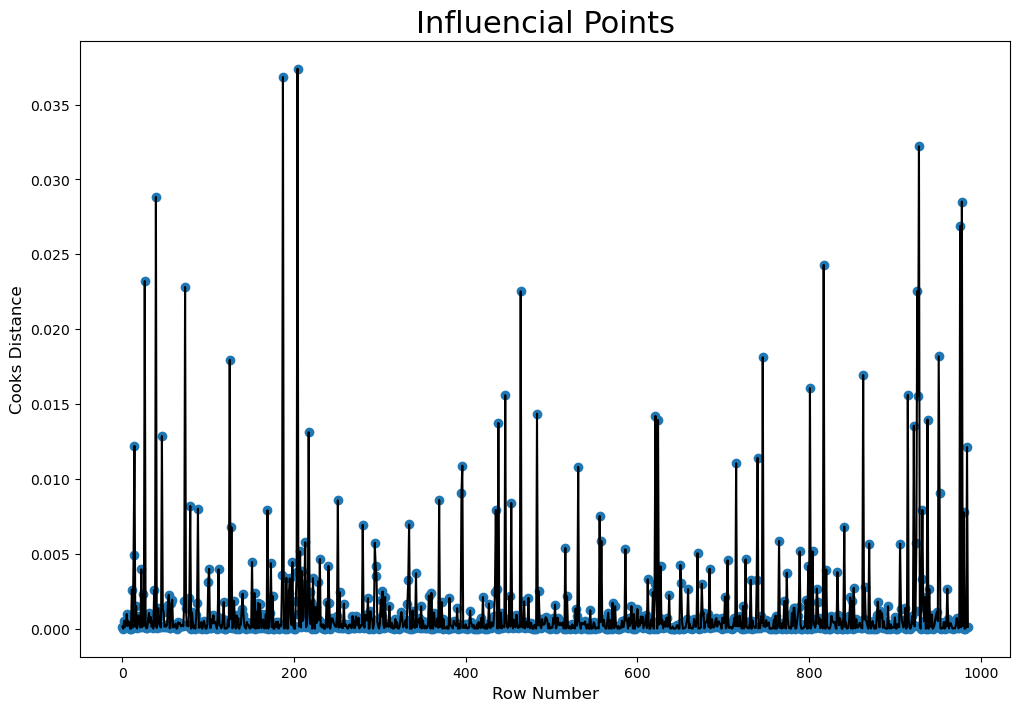

In [130]:
# Visualize the cook’s distance and find influencial points
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

mean_cooks: 0.0013511465360824954


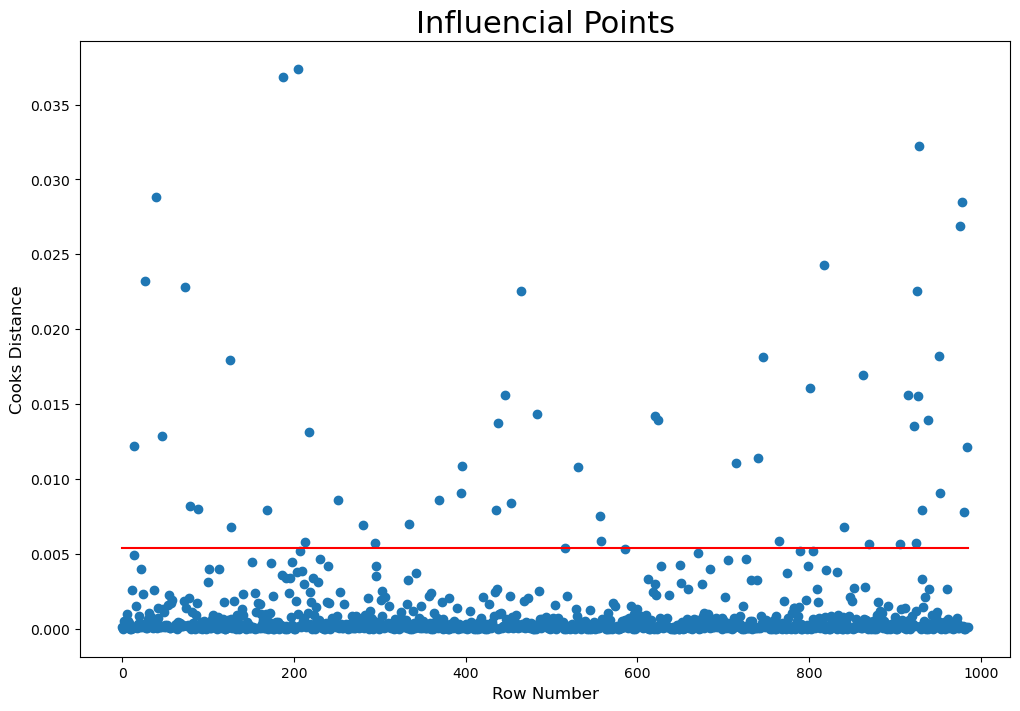

In [131]:
mean_cooks = np.mean(cooks[0])
print(f"mean_cooks: {mean_cooks}")
mean_cooks_list = [4*mean_cooks for i in df.index]
# Visualize the Influence scores
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [132]:
# Influencial points
influencial_points = df.index[cooks[0] > 4*mean_cooks]
print(f"influencial points index: {influencial_points}")
df.iloc[influencial_points, :]

influencial points index: Index([ 14,  26,  39,  46,  73,  79,  88, 125, 127, 169, 187, 204, 213, 217,
       251, 280, 294, 334, 369, 395, 396, 435, 438, 446, 453, 464, 483, 531,
       556, 558, 621, 624, 715, 740, 746, 765, 801, 817, 841, 863, 870, 906,
       915, 922, 925, 926, 927, 928, 932, 938, 951, 952, 976, 978, 980, 984],
      dtype='int64')


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
14,18,0,0,1,0,150,76,0,0,1,15000
26,22,0,0,1,0,151,97,0,0,0,15000
39,24,1,1,1,0,168,91,1,0,0,15000
46,25,1,1,0,0,179,69,0,0,0,32000
73,25,1,1,1,1,179,68,0,0,0,38000
79,30,0,0,1,1,166,87,0,0,0,38000
88,35,1,1,0,0,157,67,1,1,1,31000
125,31,1,0,1,0,187,95,1,0,0,38000
127,39,0,1,0,0,151,56,1,1,1,31000
169,42,1,0,1,0,170,80,0,0,1,38000


In [133]:
rows_to_remove=[14,  26,  39,  46,  73,  79,  88, 125, 127, 169, 187, 204, 213, 217,
       251, 280, 294, 334, 369, 395, 396, 435, 438, 446, 453, 464, 483, 531,
       556, 558, 621, 624, 715, 740, 746, 765, 801, 817, 841, 863, 870, 906,
       915, 922, 925, 926, 927, 928, 932, 938, 951, 952, 976, 978, 980, 984]

In [134]:
df_clean = df.drop(rows_to_remove)

print("Original DataFrame:")
print(df)
print("\nDataFrame after removing rows:")
print(df_clean)

Original DataFrame:
     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     He

# SPLITTING THE THE CLEANED DATASET

In [136]:
X = df_clean.drop(columns='PremiumPrice',axis=1)
Y=df_clean['PremiumPrice']

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=2)

# FITTING LINEAR REGRESSION MODEL

In [139]:
r2=LinearRegression()

In [140]:
r2.fit(X_train,Y_train)

LinearRegression()

In [141]:
test = r2.predict(X_test)

In [142]:
R2_score_test=metrics.r2_score(Y_test,test)
print(R2_score_test)

0.788541824137311


In [143]:
mse1=metrics.mean_squared_error(Y_test,test)
print(mse1)

7442265.22169942


In [144]:
import statsmodels.api as sm
X_TRAIN = sm.add_constant(X_train)
X_TEST = sm.add_constant(X_test)
MODEL = sm.OLS(Y_train, X_TRAIN).fit()
Y_pred =MODEL.predict(X_TEST)
# Calculate mean squared error
mse =metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("Model Summary:\n", MODEL.summary())

Mean Squared Error: 7442265.221699431
Model Summary:
                             OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     241.6
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          3.72e-217
Time:                        11:36:37   Log-Likelihood:                -6513.9
No. Observations:                 697   AIC:                         1.305e+04
Df Residuals:                     686   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [145]:
mae=metrics.mean_absolute_percentage_error(Y_test,test)
print(mae)

0.09541433466538651


# LASSO REGRESSION

In [147]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

m1 = Lasso()
m1.fit(X_train, Y_train)
Y_pred = m1.predict(X_test)

# Calculate regression metrics
mse2 = mean_squared_error(Y_test, Y_pred)
mae3 = mean_absolute_error(Y_test, Y_pred)
R21 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE) for Lasso Regression: {mse2}")
print(f"Mean Absolute Error (MAE) for Lasso Regression: {mae3}")
print(f"R-squared (R2) for Lasso Regression: {R21}")

Mean Squared Error (MSE) for Lasso Regression: 7442242.891806382
Mean Absolute Error (MAE) for Lasso Regression: 2220.438635336168
R-squared (R2) for Lasso Regression: 0.7885424585998447


# RIDGE REGRESSION

In [149]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

m4 = Ridge()
m4.fit(X_train, Y_train)
Y_pred = m4.predict(X_test)

# Calculate regression metrics
mse5 = mean_squared_error(Y_test, Y_pred)
mae4 = mean_absolute_error(Y_test, Y_pred)
R22 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE) for Ridge Regression: {mse5}")
print(f"Mean Absolute Error (MAE) for Ridge Regression: {mae4}")
print(f"R-squared (R2) for Ridge Regression: {R22}")

Mean Squared Error (MSE) for Ridge Regression: 7414350.532257785
Mean Absolute Error (MAE) for Ridge Regression: 2218.311063316535
R-squared (R2) for Ridge Regression: 0.7893349683122715


# RANDOM FOREST

In [151]:
from sklearn.ensemble import RandomForestClassifier
M=RandomForestClassifier()
M.fit(X_train,Y_train)
from sklearn import metrics
Y_pred=M.predict(X_test)
MSE2 = mean_squared_error(Y_test, Y_pred)
print('mse',MSE2)
print('The accuracy of random forest is:',metrics.accuracy_score(Y_pred,Y_test))
# Compute R^2 score
R00 = r2_score(Y_test, Y_pred)
print(f"R^2 Score: {R00}")

mse 2248927.0386266094
The accuracy of random forest is: 0.9313304721030042
R^2 Score: 0.9361009054273303
